## Cleaning, Transforming And Anayzing Data from Employee Exit Surveys

### This project is about cleaning,transforming and analysing two datasets from 2 different Employee's exit surveys. The goal is to present insights into or explore the relationship between the lengths of time of employment and reasons for resignation or dissatisfaction for young  and older employees. It is also intended to answer the question whether younger and older employees are resigning due to some kind of dissatisfaction or for other reasons.

### The 2 datasets are exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.  The TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) 

### Here is a few couple columns from the dete_survey.csv:
* `ID`: An id used to identify the participant of the survey
*  `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
*  `DETE Start Date`: The year the person began employment with the DETE

### And some columns  from the tafe_survey.csv:
 *  `Record ID`: An id used to identify the participant of the survey
 * `Reason for ceasing employment`: The reason why the person's employment ended
 * `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [38]:
# importing both the pandas and NumPy libraries
import pandas as pd
import numpy as np

#reading in the 2 datasets and assigning to named variables
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

dete_survey.info()

#dete_survey.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [39]:
tafe_survey.info()
#tafe_survey.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

### The initial observations made are as follows:
1. dete_survey dataset has a data shape of 822 rows by 56 columns.
2. tafe_survey dataset has data shape of 702 rows by 72 columns.
3. As a result of large shape for both datasets with columns or features that has no bearing to the questions to be addressed,subsets of both datasets has to be created to foucus on a selection of columns on interest.
4. And for the columns of interest, there are missing values that will need to be filled.
5. Columns that are of no relevant in addressing the question will have to be dropped from the two datasets
6. A merge or concactination of subsets of dataframe from the two data sets will to be done to carry out the analyzis needed


###  Identifying Missing Values and Dropping unnecessary columns

In [40]:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [41]:
# 21 columns being dropped from `dete_survey dataset
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) 
# 49 columns being dropped from `dete_survey dataset
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### 3 Changed have been made to the datasets:
1. There are 2 changes made to dete_survey. 
    * First change is to replace values 'Not Stated' in some of the important columns to be with 'NaN' values using 'pd.read_csv()' function. This is to avoid having missing values in our analysis.
    * The second change made to 'dete_survey' is to remove a total of 21 columns which are similar answers/responses to the reason for the staff resignations and wwhich are needed for the analysis
    
2. The only change made to the 'tafe_survey' dataset is similar to the removal of columns from the 'dete_survey' dataset; but in this case 49 clolumns were removed.    

### Cleaning Column Names:

In [42]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('\s+', ' ').str.strip().str.lower()
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [43]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id', 'CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 
                                                          'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 
                                                         'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                         'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN



### Comments:
The column names for the two datasets have been renamed and standardized using the pandas methods of working with and transformimg strings.
This is done because the two datasets need to be combined or merged in order to perform the analysis required in answering the posed questions of the two exit surveys.

### Filtering Data

In [44]:
print('\n Unique values in the separationtype column of dete_Survey_updated:')
dete_survey_updated['separationtype'].value_counts()


 Unique values in the separationtype column of dete_Survey_updated:


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [45]:
print('\n Unique values in the separationtype column of tafe_Survey_updated:')
tafe_survey_updated['separationtype'].value_counts()


 Unique values in the separationtype column of tafe_Survey_updated:


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [46]:
# selecting only the data for survey respondents who have a `Resignation` separation type.
dete_resignations = dete_survey_updated[(dete_survey_updated["separationtype"] == "Resignation-Other reasons") |
                                        (dete_survey_updated["separationtype"] == "Resignation-Other employer") | 
                                        (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")].copy()
tafe_resignations = tafe_survey_updated[(tafe_survey_updated["separationtype"] == "Resignation")].copy()


The pandas Series.value_counts() method have been used on the updated versions of both datasets to get an outline of unique values in the separationtype column.
Selections were made from the two subsets of the survey datasets to  to represent survey respondents who had given one form of "Resignations" or other as the reason for separation.
This has been done to help focus attention on the specific sets of data  and information connected with the group of employees or respondents who had resigned. 


### Verifying Data

In [47]:
print('\n Unique values in the cease_date column of dete_resignations:')
dete_resignations['cease_date'].value_counts()


 Unique values in the cease_date column of dete_resignations:


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [48]:
#dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split('/').str[-1]
#dete_resignations["cease_date"] = dete_resignations["cease_date"].astype('float')



In [49]:
year_pattern = r"([1-2][0-9]{3})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(year_pattern, expand=True)

dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"] = dete_resignations["cease_date"].copy() 

In [50]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [51]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [52]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

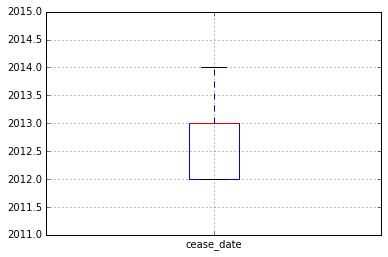

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#fig, ax = plt.subplots()
#dete_resignations.boxplot(column=["cease_date"])
dete_resignations.boxplot(column=["cease_date"]).set_ylim(2011, 2015)
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

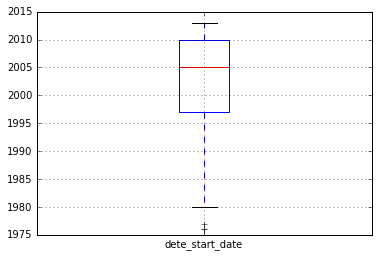

In [54]:
dete_resignations.boxplot(column=["dete_start_date"]).set_ylim(1975, 2015)
plt.show()

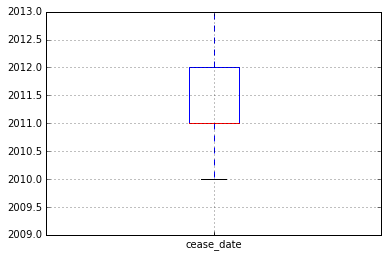

In [55]:
tafe_resignations.boxplot(column=["cease_date"])
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

In [56]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]


A new column has been created and added to the dete_resignation dataset to represent the length of service that an employee was in the service of the institute for.
This is done by Subtracting the series values in `dete_start_date` from the `cease_date` and assigning the result to `institute_service` for the new column

### Identifying  Dissatisfied Employees

In [57]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [58]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [59]:
def update_vals(val):
   if pd.isnull(val):
       return np.nan
   elif val == '-':
        return False
   else:
        return True

tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)   
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [60]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", 'dissatisfaction_with_the_department',
                                                      "physical_work_environment", "lack_of_recognition",
                                                      "lack_of_job_security", "work_location",
                                                      "employment_conditions", "work_life_balance", 
                                                      "workload"]].any(axis=1, skipna=False)   
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [61]:
dete_resignations_up["institute"] = 'DETE'
dete_resignations_up.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [62]:
tafe_resignations_up["institute"] = 'TAFE'
tafe_resignations_up.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE


In [63]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.shape

(651, 53)

In [64]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [65]:
 # dropping columns of at least 500 non-null values
combined_updated = combined.dropna(1, thresh=500).copy()
combined_updated.shape

(651, 10)

In [66]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


The changes made above was to create 2 new columns named TAFE and DETE to be used to identify and select features of the two datasets.
The two datasets were then combined using the concat() function with the ignore_index parameter set to True.
Also, some columns that are not needed were removed or dropped form the combined datasets using the dropna() method with the thresh parameter set at 500 to remove columns of 500 or less non-null values.
The reason for all the above stated operations is to narrow down the 2 datasets to specific datasets or columns needed for the required analysis.

### Cleaning the service column

In [67]:
print('\n Unique values in the service column of combined_updated:')
combined_updated['institute_service'].value_counts()


 Unique values in the service column of combined_updated:


Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [68]:
#using Series.astype() method to change the type to 'str'.
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



0        7
1       18
2        3
3       15
4        3
5       14
6        5
7      NaN
8       30
9       32
10      15
11      39
12      17
13       7
14       9
15       6
16       1
17     NaN
18      35
19      38
20       1
21      36
22       3
23       3
24      19
25       4
26       9
27       1
28       6
29       1
      ... 
621      1
622      3
623      5
624    NaN
625    NaN
626      3
627    NaN
628      1
629      1
630      1
631      1
632      3
633      1
634      1
635      1
636      1
637      3
638      1
639      5
640      5
641      1
642    NaN
643      3
644      1
645    NaN
646      5
647      1
648    NaN
649      5
650      3
Name: institute_service, Length: 651, dtype: object

In [69]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts() 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [70]:

def year_mapping(val):
   if pd.isnull(val):
       return np.nan
   elif val < 3:
        return 'New'
   elif 3 <= val < 7:
        return 'Experienced'
   elif 7 <= val < 11:
        return 'Established'
   else:
        return 'Veteran'
combined_updated["service_cat"] = combined_updated['institute_service_up'].apply(year_mapping)  

combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Performimg Initial Analysis

In [71]:
combined_updated['dissatisfied'].value_counts(dropna=False) 

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [72]:
#using fillna() method to replace missing values
combined_updated['dissatisfied'].fillna(True, inplace=True)
#combined_updated['dissatisfied'].fillna(False)

In [73]:
combined_updated['dissatisfied'].value_counts(dropna=False) 


False    403
True     248
Name: dissatisfied, dtype: int64

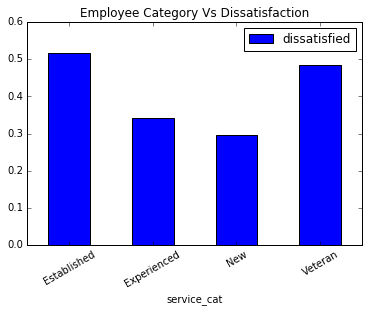

In [74]:

#Use a pivot table to aggregate the data according to Region.
pvt_combined = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline
pvt_combined.plot(kind='bar', title='Employee Category Vs Dissatisfaction', rot=30)